In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from matplotlib import colors
%matplotlib inline


In [34]:
data_df = pd.read_csv('statistics_data.csv')
data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [35]:
data_df = data_df.drop(['Unnamed: 32', 'id'], axis=1)

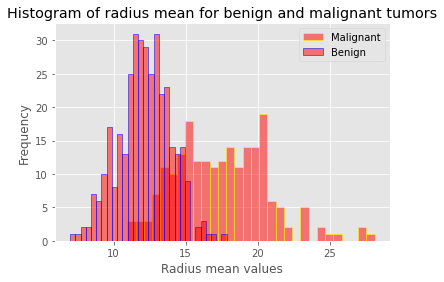

Most frequent malignant radius mean is:  20.101999999999997


In [39]:
# Histogram

# Distribution of variable - How many times each values appears in dataset

m = plt.hist(data_df[data_df['diagnosis'] == 'M'].radius_mean, bins=30, fc=(1, 0, 0, 0.5), color='green', label='Malignant',  edgecolor='yellow')
b = plt.hist(data_df[data_df['diagnosis'] == 'B'].radius_mean, bins=30, fc=(1, 0, 0, 0.5), color='red', label='Benign',  edgecolor='blue')
plt.legend()
plt.xlabel('Radius mean values')
plt.ylabel('Frequency')
plt.title('Histogram of radius mean for benign and malignant tumors')
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print('Most frequent malignant radius mean is: ', most_frequent_malignant_radius_mean)

In [41]:
# Outliers
# Outlier values can be errors or rare events
# Calculating outliers:
# - calculate first quartile (Q1)(25%)
# - find IQR (inter quartile range) = Q3 - Q1
# - compute Q1 - 1.5IQR and Q3 + 1.5IQR
# - anything outside this is an outlier


In [42]:
# Benign tumor distribution
data_benign = data_df[data_df['diagnosis'] == 'B']
data_malignant = data_df[data_df['diagnosis'] == 'M']
desc = data_benign.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('Anything outside this range is an outlier: (', lower_bound, ',', upper_bound, ')')
data_benign[data_benign.radius_mean < lower_bound].radius_mean
print('Outliers:', data_benign[(data_benign.radius_mean < lower_bound) | (data_benign.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers: [ 6.981 16.84  17.85 ]


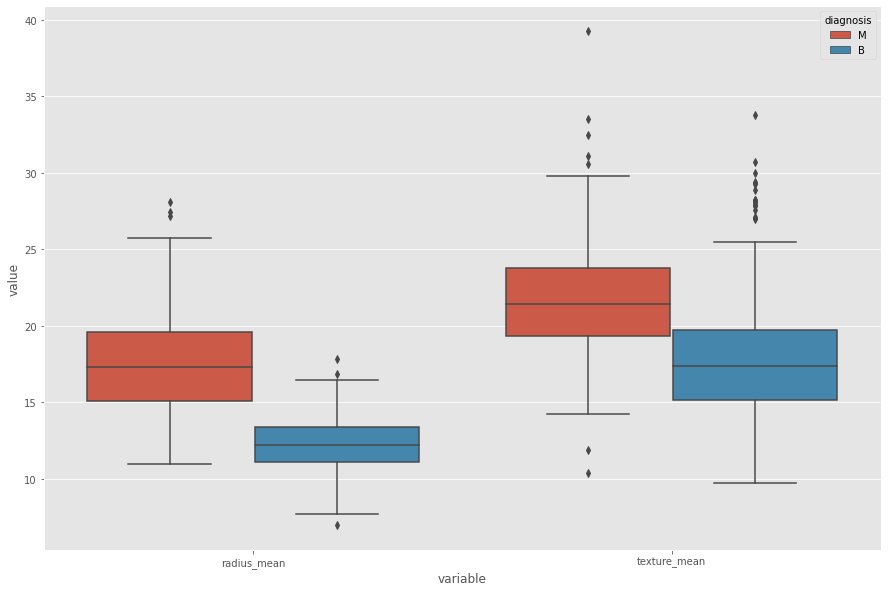

In [43]:
# Box plot

melted_data = pd.melt(data_df, id_vars='diagnosis', value_vars=['radius_mean', 'texture_mean'])
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', hue='diagnosis', data=melted_data)
plt.show()

In [44]:
# Summary statistics
print('mean: ', data_benign.radius_mean.mean())
print('variance: ', data_benign.radius_mean.var())
print('standard deviation: ', data_benign.radius_mean.std())
print('describe method: ', data_benign.radius_mean.describe())

mean:  12.14652380952381
variance:  3.170221722043872
standard deviation:  1.7805116461410389
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


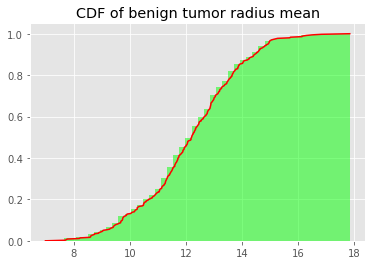

In [46]:
# Cumulative distribution function
# - Probability that the variable takes a value less than or equal to x.

plt.hist(data_benign.radius_mean, bins=50, fc=(0, 1, 0, 0.5), label='Benign', density=True, cumulative=True)
sorted_data = np.sort(data_benign.radius_mean)
y = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)
plt.plot(sorted_data, y, color='red')
plt.title('CDF of benign tumor radius mean')
plt.show()

In [47]:
# Effect size
# Simply way of quantifying difference between two groups by describing the size of an effect.

# Cohen effect size suggests that if effect size d(effect_size) = 0.2, it is small, d=0.5 it is medium, d = 0.8 it is large.

mean_diff = data_malignant.radius_mean.mean() - data_benign.radius_mean.mean()
var_benign = data_benign.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()
var_pooled = (len(data_benign) * var_benign + len(data_malignant) * var_malignant) / float(len(data_benign) + len(data_malignant))
effect_size = mean_diff / np.sqrt(var_pooled)
print("Effect size: ", effect_size)

# Effect size is 2.2 that says that two groups are different from each other

Effect size:  2.2048585165041428


<Figure size 1080x720 with 0 Axes>

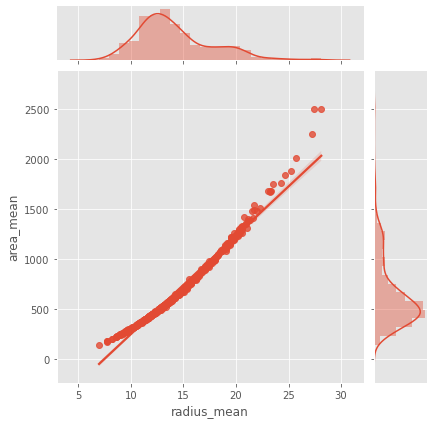

In [48]:
# Relationship between variables

# Simplest way to check relationship between variables is scatter plot

plt.figure(figsize=(15, 10))
sns.jointplot(data_df.radius_mean, data_df.area_mean, kind='regg')
plt.show()

# When radius mean increases, area mean also increases. They are positively correlated with each other.

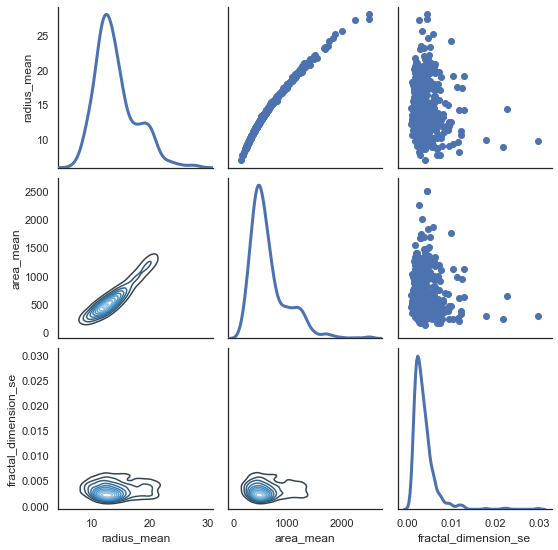

In [49]:
# We can look relationship between more than 2 distributions
sns.set(style='white')
df = data_df.loc[:, ['radius_mean', 'area_mean', 'fractal_dimension_se']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

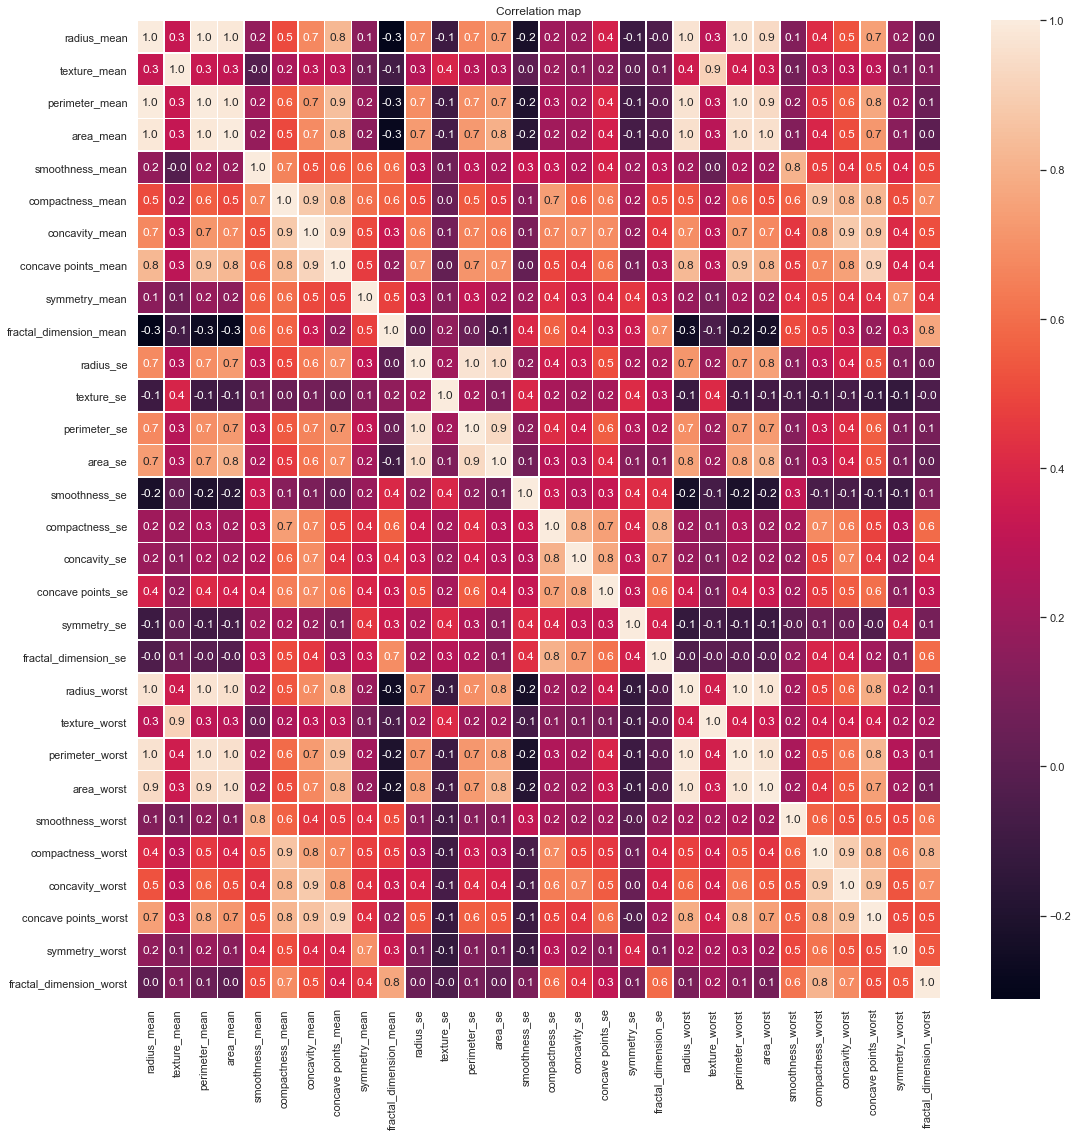

In [50]:
# Correlation
# Strenght of the relationship between variables

f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_df.corr(), annot=True, linewidths=0.5, fmt='.1f', ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation map')
plt.savefig('correlation_heatmap.png')
plt.show()

# Range is from -1 to 1. 
# 1 is positively correlated, -1 is negatively correlated. 0 means there is no correlation between two variables.

In [51]:
# Covariance
# Measure of the tendency of two variables to vary together
# It is maximized if two vectors are identical
# It is zero if they are orthogonal
# It is negative if they are in opposite direction

np.cov(data_df.radius_mean, data_df.area_mean)
print('Covariance between radius mean and area mean: ', data_df.radius_mean.cov(data_df.area_mean))
print('Covariance between radius mean and fractal dimension se: ', data_df.radius_mean.cov(data_df.fractal_dimension_se))

Covariance between radius mean and area mean:  1224.4834093464565
Covariance between radius mean and fractal dimension se:  -0.0003976248576440626


In [52]:
# Pearson correlation
# Division of covariance by standard deviation of variables

p1 = data_df.loc[:, ['area_mean', 'radius_mean']].corr(method='pearson')
p2 = data_df.radius_mean.cov(data_df.area_mean) / (data_df.radius_mean.std() * data_df.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ', p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.9873571700566128


In [54]:
# Spearman's rank correlation
# Pearson correlation works well if the relationship between variables are linear and variables are roughly normal. 
# But it is not robust if there are outliers
# To compute spearman's correlation we need to compute rank of each value

ranked_data = data_df.rank()
spearman_corr = ranked_data.loc[:, ['area_mean', 'radius_mean']].corr(method='pearson')
print('Spearmans correlation: ')
print(spearman_corr)

Spearmans correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


In [55]:
# Hypothesis testing
# Are radius mean and area mean related to each other?
# Null hypothesis is that relationship between radius mean and area mean is zero in tumor population. 
# We need to refute this null hypothesis in order to demonstrate that radius mean and area mean are related.

# Finding p-value
statistic, p_value = stats.ttest_rel(data_df.radius_mean, data_df.area_mean)
print('p-value: ', p_value)

# p-value is almost zero so we can reject null hypothesis


p-value:  1.5253492492559045e-184
